### XGBoost
XGBoost是目前 Kaggle競賽中最常見到的演算法


![image](./img/XGBoost1.jpg)

1. XGBoost 全名為eXtreme Gradient Boosting
2. 以Gradient Boosting 為基礎下去實作
3. 每一棵樹是互相關聯的
4. 和隨機森林一樣採用特徵隨機採樣的技巧
5. 是Ensemble learning中的Boosting的實例

### Bagging vs. Boosting
1. Bagging 透過抽樣的方式生成樹，每顆樹彼此獨立
2. Boosting 透過序列的方式生成樹，後面生成的樹與前一棵樹相關

![image](./img/BaggingBoosting.jpg)

In [1]:
import pandas as pd             #進行資料處理函式庫
import numpy as np              #高階大量的維度陣列與矩陣計算
import matplotlib.pyplot as plt #繪圖
import seaborn as sns           #繪圖
import io                       #負責處理資料 input/output
import requests                 #HTTP Request下載訓練資料用

### 一)載入資料集

In [19]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
s = requests.get(url).content
df_train = pd.read_csv(io.StringIO(s.decode("utf-8")))
#df_train = df_train.drop(labels=["sepal.length"],axis=1)    #移除sepal.length  axis= 1為行 0為列
df_train

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


### 二)手動編碼

In [3]:
lable_map = {"Setosa":0,"Versicolor":1,"Virginica":2}
#將編碼後的lable map存至df_train["variety"]中。
df_train["Class"] = df_train["variety"].map(lable_map)

lable_map
df_train

,sepal.length,sepal.width,petal.length,petal.width,variety,Class
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,2
146,6.3,2.5,5.0,1.9,Virginica,2
147,6.5,3.0,5.2,2.0,Virginica,2
148,6.2,3.4,5.4,2.3,Virginica,2


### 三)檢查缺失值

In [4]:
X = df_train.drop(labels=["variety","Class"],axis=1).values #移除 class,variety(因為字母不參與訓練)
#checked missing data
print("checked missing data(NAN mount):",len(np.where(np.isnan(X))[0]))

checked missing data(NAN mount): 0


### 四)切割訓練集與測試集

In [5]:
from sklearn.model_selection import train_test_split
X = df_train.drop(labels=["Class","variety"],axis=1)
y = df_train["Class"]
X_train , X_test ,y_train , y_test = train_test_split(X,y , test_size = .3 , random_state=42)

In [6]:
print("Training data shape : ",X_train.shape)
print("Testing data shape : ", X_test.shape)

Training data shape :  (105, 4)
Testing data shape :  (45, 4)


### XGBoost
Boosting 則是希望能夠由後面生成的樹，來修正前面樹，學得不好的地方

Paremeter:
1. n_estimators : 總共迭代的次數，即決策樹的個數，預設值為100
2. max_depth : 樹的最大深度，默認值為6
3. booster : gbtree 樹模型(預設) / gblinear 線性模型
4. learning_rate : 學習速率 ， 預設0.3
5. gamma : 懲罰項係數，指定節點分裂所需的最小損失函數下降值

Attributes :
1. feature_importances_ : 查詢模型特徵的重要程度

Methods :
1. fit : 放入X、y進行模型擬合
2. predict : 預測並回傳預測類別
3. score : 預測成功的比例
4. predict_proba : 預測每個類別的機率值


In [11]:
from xgboost import XGBRFClassifier

#建立XGBClassifier 模型
xgboostModel = XGBRFClassifier(n_estimator=100,learning_rate=0.3)

#使用訓練資料訓練模型
xgboostModel.fit(X_train,y_train)

#使用訓練資料預測分類
predicted = xgboostModel.predict(X_train)

d:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:51:11] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:51:11] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### 使用Score評估模型

In [13]:
#預測成功的比例
print("訓練集: ",xgboostModel.score(X_train,y_train))

print("測試集: ",xgboostModel.score(X_test,y_test))

訓練集:  0.9619047619047619
測試集:  1.0


### 特徵重要程度

特徵重要程度:  [0.03384889 0.11432604 0.44072983 0.4110953 ]


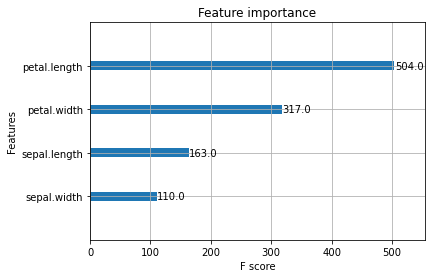

In [15]:
from xgboost import plot_importance
from xgboost import plot_tree

plot_importance(xgboostModel)

print("特徵重要程度: " , xgboostModel.feature_importances_)

### 真實分類

In [16]:
# 建立訓練集的DataFrame
df_train = pd.DataFrame(X_train)
df_train["Class"] = y_train

#建立測試集的DataFrame

df_test = pd.DataFrame(X_test)
df_test["Class"] = y_test

d:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


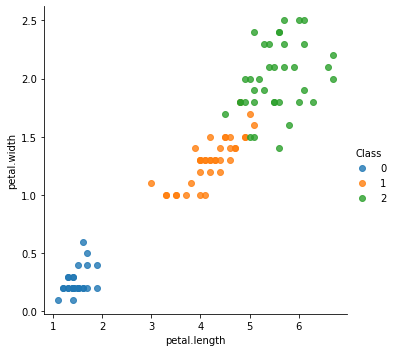

In [17]:
sns.lmplot("petal.length","petal.width",hue="Class",data=df_train,fit_reg=False)

### XGBooost(訓練集)預測結果

d:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


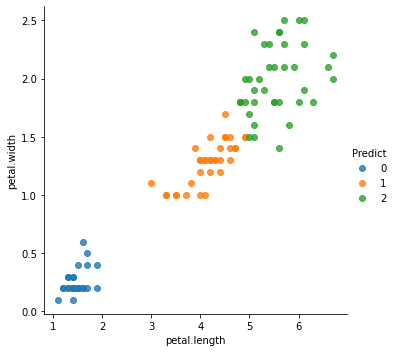

In [18]:
df_train["Predict"] = predicted
sns.lmplot('petal.length',"petal.width",data=df_train,hue="Predict",fit_reg=False)

plt.show()